In [436]:
# !pip install timefold

In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit

In [438]:
df_train = pd.read_csv('train.csv')

In [439]:
df_train

,volume_kg,distribution_channel,customer,brand,channel,store_format,category,year,month
0,460.026585,0,1,1,FOOD SERVICE,3,3,2010,1
1,456.944328,0,1,1,FOOD SERVICE,3,3,2010,2
2,926.790243,0,1,1,FOOD SERVICE,3,3,2010,3
3,762.549167,0,1,1,FOOD SERVICE,3,3,2010,4
4,1132.060704,0,1,1,FOOD SERVICE,3,3,2010,5
...,...,...,...,...,...,...,...,...,...
5788,938.077344,1,15,1,DISCOUNTS,1,10,2019,12
5789,464.815891,1,15,1,DISCOUNTS,1,10,2020,1
5790,471.421097,1,15,1,DISCOUNTS,1,10,2020,2
5791,12611.841468,1,15,1,DISCOUNTS,1,10,2020,3


In [440]:
df_train["serie_name"] = pd.concat([df_train["distribution_channel"], df_train["customer"], df_train["brand"], df_train["channel"], df_train["store_format"], df_train["category"]], axis=1).apply(lambda x: f"{x[0]}_{x[1]}_{x[2]}_{x[3]}_{x[4]}_{x[5]}", axis=1)
df_train

,volume_kg,distribution_channel,customer,brand,channel,store_format,category,year,month,serie_name
0,460.026585,0,1,1,FOOD SERVICE,3,3,2010,1,0_1_1_FOOD SERVICE_3_3
1,456.944328,0,1,1,FOOD SERVICE,3,3,2010,2,0_1_1_FOOD SERVICE_3_3
2,926.790243,0,1,1,FOOD SERVICE,3,3,2010,3,0_1_1_FOOD SERVICE_3_3
3,762.549167,0,1,1,FOOD SERVICE,3,3,2010,4,0_1_1_FOOD SERVICE_3_3
4,1132.060704,0,1,1,FOOD SERVICE,3,3,2010,5,0_1_1_FOOD SERVICE_3_3
...,...,...,...,...,...,...,...,...,...,...
5788,938.077344,1,15,1,DISCOUNTS,1,10,2019,12,1_15_1_DISCOUNTS_1_10
5789,464.815891,1,15,1,DISCOUNTS,1,10,2020,1,1_15_1_DISCOUNTS_1_10
5790,471.421097,1,15,1,DISCOUNTS,1,10,2020,2,1_15_1_DISCOUNTS_1_10
5791,12611.841468,1,15,1,DISCOUNTS,1,10,2020,3,1_15_1_DISCOUNTS_1_10


In [441]:
print("Number of unique time series: ", df_train["serie_name"].nunique())

Number of unique time series:  48


Example plot of one serie

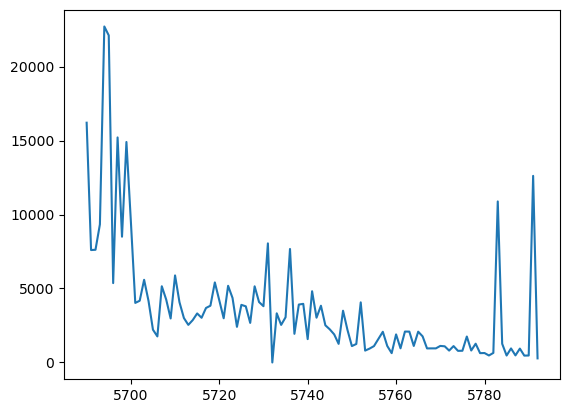

In [442]:
ts1 = df_train[df_train["serie_name"] == "1_15_1_DISCOUNTS_1_10"]
plt.plot(ts1.index, ts1["volume_kg"])

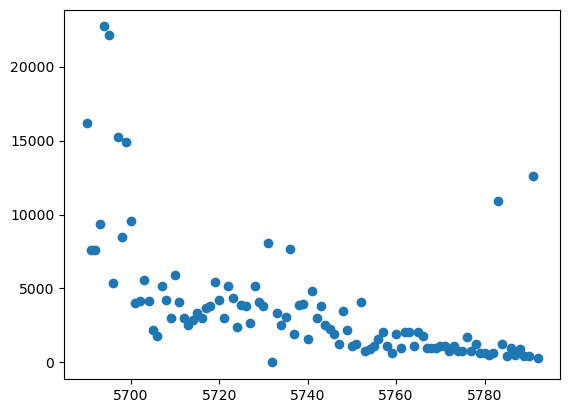

In [443]:
plt.scatter(ts1.index, ts1["volume_kg"])

In [444]:
ts1.drop(["distribution_channel", "customer", "brand", "channel", "store_format", "category"], axis=1, inplace=True)

/var/folders/wv/3b43qgz11h7bfc6b19gpz1_c0000gn/T/ipykernel_38471/2544535459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts1.drop(["distribution_channel", "customer", "brand", "channel", "store_format", "category"], axis=1, inplace=True)


In [445]:
ts1

,volume_kg,year,month,serie_name
5690,16204.744324,2010,1,1_15_1_DISCOUNTS_1_10
5691,7598.342304,2010,3,1_15_1_DISCOUNTS_1_10
5692,7617.416265,2010,4,1_15_1_DISCOUNTS_1_10
5693,9333.721886,2010,5,1_15_1_DISCOUNTS_1_10
5694,22708.317207,2010,7,1_15_1_DISCOUNTS_1_10
...,...,...,...,...
5788,938.077344,2019,12,1_15_1_DISCOUNTS_1_10
5789,464.815891,2020,1,1_15_1_DISCOUNTS_1_10
5790,471.421097,2020,2,1_15_1_DISCOUNTS_1_10
5791,12611.841468,2020,3,1_15_1_DISCOUNTS_1_10


In [446]:
# Convert to datetime
df_train['date'] = pd.to_datetime(df_train[['year', 'month']].assign(day=1))
df_train.set_index(["serie_name",'date'], inplace=True)

In [447]:
df_train.drop(["distribution_channel", "customer", "brand", "channel", "store_format", "category","year", "month"], axis=1, inplace=True)

In [448]:
df_train

volume_kg
serie_name             date                    
0_1_1_FOOD SERVICE_3_3 2010-01-01    460.026585
                       2010-02-01    456.944328
                       2010-03-01    926.790243
                       2010-04-01    762.549167
                       2010-05-01   1132.060704
...                                         ...
1_15_1_DISCOUNTS_1_10  2019-12-01    938.077344
                       2020-01-01    464.815891
                       2020-02-01    471.421097
                       2020-03-01  12611.841468
                       2020-04-01    277.491080

[5793 rows x 1 columns]

Impute missing values

In [449]:
total = pd.DataFrame()
for ts in df_train.index.get_level_values(0).unique():
    aux = df_train.loc[ts]
    aux = aux.asfreq('MS')
    df_interpolated = aux.interpolate(method='time')
    df_interpolated['serie_name'] = [ts] * len(aux)
    df_interpolated = df_interpolated.set_index(['serie_name'],append=True)
    total = pd.concat([total,df_interpolated], axis=0)

total = total.swaplevel()
total

volume_kg
serie_name             date                    
0_1_1_FOOD SERVICE_3_3 2010-01-01    460.026585
                       2010-02-01    456.944328
                       2010-03-01    926.790243
                       2010-04-01    762.549167
                       2010-05-01   1132.060704
...                                         ...
1_15_1_DISCOUNTS_1_10  2019-12-01    938.077344
                       2020-01-01    464.815891
                       2020-02-01    471.421097
                       2020-03-01  12611.841468
                       2020-04-01    277.491080

[5834 rows x 1 columns]

INTERPOLATE ON A DAILY BASIS

In [450]:
# def interpolate_series(df):
#     # Get unique series names
#     series_names = df.index.get_level_values('serie_name').unique()
    
#     interpolated_dfs = []
    
#     for serie in series_names:
#         # Filter data for the current series
#         series_df = df.loc[serie]
        
#         # Create a daily date range for the current series
#         date_range = pd.date_range(start=series_df.index.min(), end=series_df.index.max(), freq='D')
        
#         # Reindex the DataFrame to include all dates in the range
#         series_df = series_df.reindex(date_range)
        
#         # Interpolate the missing values
#         series_df['volume_kg'] = series_df['volume_kg'].interpolate()
        
#         # Reset index and add the 'serie_name' column back
#         series_df.reset_index(inplace=True)
#         series_df['serie_name'] = serie
#         series_df.set_index(['serie_name', 'index'], inplace=True)
#         series_df.index.names = ['serie_name', 'date']
        
#         interpolated_dfs.append(series_df)
    
#     # Concatenate all the interpolated DataFrames
#     interpolated_df = pd.concat(interpolated_dfs)
    
#     return interpolated_df

# # Apply the interpolation function
# interpolated_df = interpolate_series(total)

In [451]:
# interpolated_df

In [452]:
# df_train = interpolated_df
df_train = total

In [453]:
idxs = df_train.index.get_level_values(0).unique()
idxs

Index(['0_1_1_FOOD SERVICE_3_3', '0_1_1_FOOD SERVICE_3_6',
       '0_1_1_FOOD SERVICE_3_10', '0_1_2_FOOD SERVICE_3_10',
       '0_4_0_FOOD SERVICE_3_10', '0_4_1_FOOD SERVICE_3_6',
       '0_4_1_FOOD SERVICE_3_10', '0_4_2_FOOD SERVICE_3_10',
       '0_4_3_FOOD SERVICE_3_10', '0_5_0_FOOD SERVICE_3_10',
       '0_5_1_FOOD SERVICE_3_3', '0_5_1_FOOD SERVICE_3_6',
       '0_5_1_FOOD SERVICE_3_10', '0_5_2_FOOD SERVICE_3_10',
       '0_5_3_FOOD SERVICE_3_10', '0_6_0_FOOD SERVICE_3_10',
       '0_6_1_FOOD SERVICE_3_6', '0_6_1_FOOD SERVICE_3_10',
       '0_6_2_FOOD SERVICE_3_10', '0_6_3_FOOD SERVICE_3_10',
       '0_8_0_FOOD SERVICE_3_10', '0_8_1_FOOD SERVICE_3_3',
       '0_8_1_FOOD SERVICE_3_6', '0_8_1_FOOD SERVICE_3_10',
       '0_8_2_FOOD SERVICE_3_10', '0_8_3_FOOD SERVICE_3_10',
       '1_2_1_DISCOUNTS_1_10', '1_2_2_DISCOUNTS_1_10',
       '1_10_1_MODERN TRADE_2_6', '1_10_1_MODERN TRADE_2_10',
       '1_10_2_MODERN TRADE_2_10', '1_11_1_MODERN TRADE_2_3',
       '1_11_1_MODERN TRADE_2_6', '1

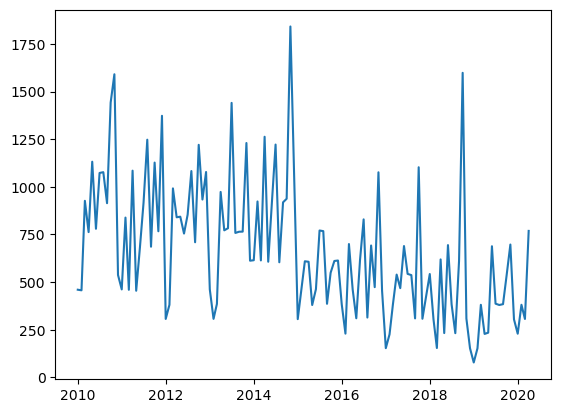

In [454]:
# for i in range(len(idxs)):
#     plt.plot(df_train.loc[idxs[i]].index, df_train.loc[idxs[i]]["volume_kg"]);
plt.plot(df_train.loc[idxs[0]].index, df_train.loc[idxs[0]]["volume_kg"]);

Test stationarity

In [455]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_train.loc[idxs[0]]["volume_kg"])

print("ADF test statistic: ", adf_test[0])
print("p-value: ", adf_test[1])

ADF test statistic:  -0.9717444278937215
p-value:  0.7634298903100857


In [456]:
p_values = np.zeros(len(idxs))

for i in range(len(idxs)):
    tmp = adfuller(df_train.loc[idxs[i]]["volume_kg"])
    p_values[i] = tmp[1]

print("p-value: ", np.mean(p_values))

p-value:  0.5052891442332093


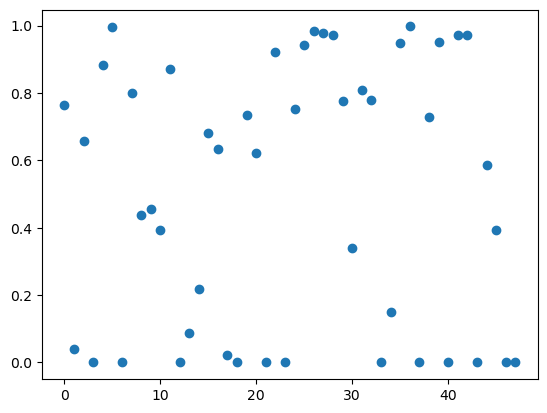

In [457]:
plt.scatter(range(len(idxs)), p_values)

Since a lot of p-values are > 0.05, we cinclude that the time series are not stationary


---
## Making stationary

In [458]:
#Fourier transform:


from scipy.fftpack import fft
# Select one time series
ts1 = df_train.loc[df_train.index.get_level_values(0).unique()[20]]
# ts1 = df_train.loc['1_15_1_DISCOUNTS_1_10']

# # Perform Fourier Transform
# volume_kg = ts1['volume_kg'].values
# fft_result = fft(volume_kg)

# # Calculate frequencies
# n = len(volume_kg)
# freq = np.fft.fftfreq(n)

# # Plot the Fourier Transform results
# plt.figure(figsize=(12, 6))
# plt.plot(freq, np.abs(fft_result))
# plt.title('Fourier Transform of Time Series: 1_15_1_DISCOUNTS_1_10')
# plt.xlabel('Frequency')
# plt.ylabel('Amplitude')
# plt.grid(True);

<AxesSubplot:xlabel='date'>

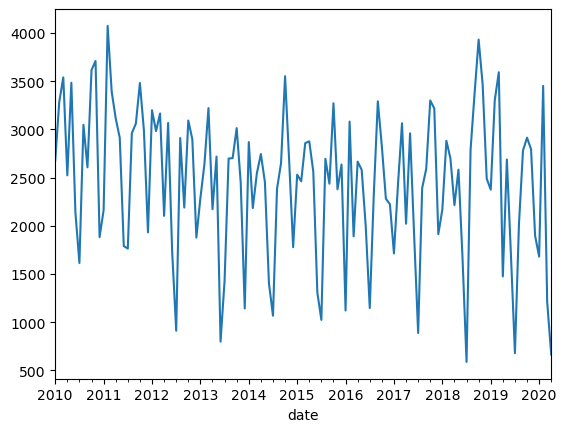

In [459]:
ts1["volume_kg"].plot()

In [460]:
adfuller(ts1["volume_kg"].diff()[1:])[1]

0.0002068213854415317

In [461]:
p_values = np.zeros(len(idxs))

for i in range(len(idxs)):
    tmp = adfuller(df_train.loc[idxs[i]]["volume_kg"].diff()[1:])
    p_values[i] = tmp[1]

print("p-value: ", np.mean(p_values))

p-value:  0.00736592437743198


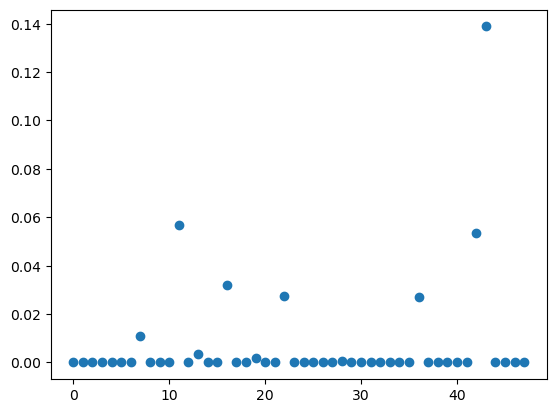

In [462]:
plt.scatter(range(len(idxs)), p_values)

In [463]:
tscv = TimeSeriesSplit()
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


IMPUTE MISSING VALUES

In [464]:
ts1



,volume_kg
date,
2010-01-01,2675.079614
2010-02-01,3285.002327
2010-03-01,3539.868537
2010-04-01,2523.609289
2010-05-01,3484.254987
...,...
2019-12-01,1897.744848
2020-01-01,1680.426302
2020-02-01,3451.486983


FEATURE EXTRACTION

In [465]:
# Consider as training only the 70% of the data
idx_train = int(len(ts1)*0.95)

data_tr = ts1[:idx_train]
data_te = ts1[idx_train:]

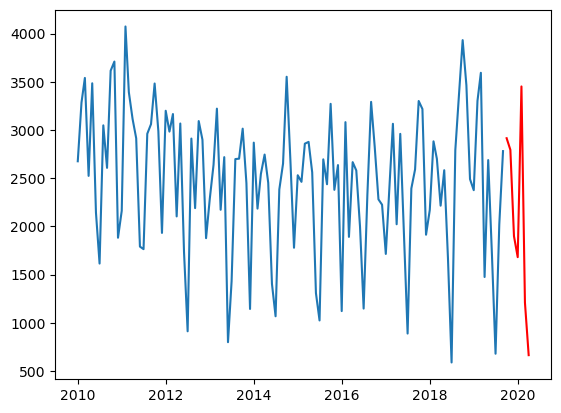

In [466]:
plt.plot(data_tr['volume_kg'])
plt.plot(data_te['volume_kg'], color = 'red')

https://towardsdatascience.com/modeling-variable-seasonal-features-with-the-fourier-transform-18c792102047

In [467]:
import pandas as pd
import numpy as np
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# Define compute_spectrum function
def compute_spectrum(ts_data, max_period, min_amplitude=0.01, detrend='linear'):
    nperseg = max_period
    noverlap = nperseg - 1

    frequencies, times, spectrum = spectrogram(x=ts_data, nperseg=nperseg, noverlap=noverlap, detrend=detrend)
    times = pd.DataFrame({'time_index': times}).round().astype(int)
    with np.errstate(divide='ignore'):
        periods = pd.DataFrame({'period': 1 / frequencies}).round(decimals=3).astype(str)
    spectrum = pd.DataFrame(spectrum.T, columns=periods['period'].to_list(), index=ts_data.index[times['time_index']])
    relative_amplitudes = spectrum.sum(axis=0) / spectrum.sum(axis=0).max()
    spectrum = spectrum[relative_amplitudes[relative_amplitudes >= min_amplitude].index.to_list()]
    return spectrum

# Fit linear regression model
envelope_features = DeterministicProcess(index=ts1.index, constant=True, order=2, seasonal=True,drop=True).in_sample()
spec4_train = compute_spectrum(ts1['volume_kg'], max_period=4)

ts1 = pd.concat([ts1,envelope_features],axis=1)
print(ts1)

spec4_model = LinearRegression()
spec4_model.fit(envelope_features.loc[spec4_train.index], spec4_train['4.0'])
spec4_regress = pd.Series(spec4_model.predict(envelope_features), index=ts1.index)

# Print the results
print(spec4_regress)

              volume_kg  const  trend  trend_squared  s(2,12)  s(3,12)  \
date                                                                     
2010-01-01  2675.079614    1.0    1.0            1.0      0.0      0.0   
2010-02-01  3285.002327    1.0    2.0            4.0      1.0      0.0   
2010-03-01  3539.868537    1.0    3.0            9.0      0.0      1.0   
2010-04-01  2523.609289    1.0    4.0           16.0      0.0      0.0   
2010-05-01  3484.254987    1.0    5.0           25.0      0.0      0.0   
...                 ...    ...    ...            ...      ...      ...   
2019-12-01  1897.744848    1.0  120.0        14400.0      0.0      0.0   
2020-01-01  1680.426302    1.0  121.0        14641.0      0.0      0.0   
2020-02-01  3451.486983    1.0  122.0        14884.0      1.0      0.0   
2020-03-01  1209.010446    1.0  123.0        15129.0      0.0      1.0   
2020-04-01   663.662279    1.0  124.0        15376.0      0.0      0.0   

            s(4,12)  s(5,12)  s(6,12)

In [468]:
spec4_regress = spec4_regress / spec4_regress.mean()

season_columns = ['s(2,12)', 's(3,12)', 's(4,12)', 's(5,12)', 's(6,12)', 's(7,12)', 's(8,12)', 's(9,12)', 's(10,12)', 's(11,12)', 's(12,12)']
for c in season_columns:
    ts1[c] = ts1[c] * spec4_regress
print(ts1)

              volume_kg  const  trend  trend_squared   s(2,12)   s(3,12)  \
date                                                                       
2010-01-01  2675.079614    1.0    1.0            1.0  0.000000  0.000000   
2010-02-01  3285.002327    1.0    2.0            4.0  1.151254  0.000000   
2010-03-01  3539.868537    1.0    3.0            9.0  0.000000  1.629445   
2010-04-01  2523.609289    1.0    4.0           16.0  0.000000  0.000000   
2010-05-01  3484.254987    1.0    5.0           25.0  0.000000  0.000000   
...                 ...    ...    ...            ...       ...       ...   
2019-12-01  1897.744848    1.0  120.0        14400.0  0.000000  0.000000   
2020-01-01  1680.426302    1.0  121.0        14641.0  0.000000  0.000000   
2020-02-01  3451.486983    1.0  122.0        14884.0  1.292324  0.000000   
2020-03-01  1209.010446    1.0  123.0        15129.0  0.000000  1.816166   
2020-04-01   663.662279    1.0  124.0        15376.0  0.000000  0.000000   

           

MAPE: 0.7744865180964959


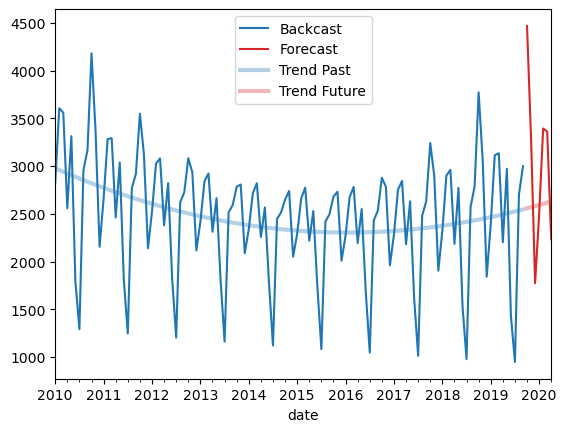

In [469]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from scipy.signal import periodogram, spectrogram

def do_forecast(X, index_train, index_test, trend_order):
    X_train = X.loc[index_train]
    X_test = X.loc[index_test]
    
    y_train = X_train['volume_kg']
    y_test = X_test['volume_kg']

    X_train = X_train.drop('volume_kg', axis=1)
    X_test = X_test.drop('volume_kg', axis=1)


    model = LinearRegression(fit_intercept=False)
    _ = model.fit(X_train, y_train)
    y_fore = pd.Series(model.predict(X_test), index=index_test)
    y_past = pd.Series(model.predict(X_train), index=index_train)

    trend_columns = X_train.columns.to_list()[0 : trend_order + 1]
    model_trend = LinearRegression(fit_intercept=False)
    _ = model_trend.fit(X_train[trend_columns], y_train)
    y_trend_fore = pd.Series(model_trend.predict(X_test[trend_columns]), index=index_test)
    y_trend_past = pd.Series(model_trend.predict(X_train[trend_columns]), index=index_train)

    MAPE = mean_absolute_percentage_error(y_test, y_fore)
    print(f'MAPE: {MAPE}')

    ax = y_past.plot(color='C0', label='Backcast')
    ax = y_fore.plot(color='C3', label='Forecast')
    ax = y_trend_past.plot(ax=ax, color='C0', linewidth=3, alpha=0.333, label='Trend Past')
    ax = y_trend_fore.plot(ax=ax, color='C3', linewidth=3, alpha=0.333, label='Trend Future')
    _ = ax.legend()

do_forecast(ts1, data_tr.index, data_te.index, 2)